# 4.Subway EDA

Bus: Jan. 01, 2014 - May 31, 2020

Street car: Jan. 02 2014 - May 31 2020

Subway: Jan. 01 2014 - June 2020 

~700k records of incident delay for the past 6 year 

## 3.1 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import seaborn as sns

In [2]:
subway_df = pd.read_csv('./data/subway_cleaned.csv')

## 3.2 Overview

In [3]:
subway_df.head()

,exact_date,exact_time,day_of_week,station,code,delay_min,gap_min,bound,line,vehicle,year,month,day,hour,min,at_station,line_simp,delay_type
0,2014-01-01,10:25:00 AM,Wednesday,COXWELL STATION,MUTO,5,11,W,BD,5315,2014,1,1,10,25,1,BD,short
1,2014-01-01,11:20:00 AM,Wednesday,DUFFERIN STATION,MUIR,7,12,W,BD,5015,2014,1,1,11,20,1,BD,short
2,2014-01-01,11:22:00 PM,Wednesday,VICTORIA PARK STATION,SUAP,0,0,NaN,BD,0,2014,1,1,23,22,1,BD,short
3,2014-01-01,12:04:00 PM,Wednesday,QUEEN STATION,SUO,4,8,S,YU,5681,2014,1,1,12,4,1,YU,short
4,2014-01-01,12:21:00 AM,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,2014,1,1,0,21,1,BD,long


In [4]:
print("There's %s records of incident and %s columns in the subway dataset."%(subway_df.shape[0],subway_df.shape[1]))

There's 113389 records of incident and 18 columns in the subway dataset.


In [6]:
print('The bus dataset starts from %s to %s.'%(subway_df.iloc[0]['exact_date'],subway_df.iloc[-1]['exact_date']))

The bus dataset starts from 2014-01-01 to 2020-06-30.


## 3.3 Check Missing values

In [24]:
missing_vals_subway = (subway_df.isnull().sum() / subway_df.shape[0]) * 100 
missing_vals_subway[missing_vals_subway > 0].sort_values(ascending=False)

Bound        22.373422
line_simp     0.448897
Line          0.364233
Code          0.000882
dtype: float64

### Insights
- There's a lot of vehicle numbers missing in the bus dataset at about 15%.
- Bound column in the subway dataset has 22% missing values.

In [35]:
bus_df.columns

Index(['report_date', 'Route', 'Time', 'Day', 'Location', 'Incident',
       'delay_min', 'gap_min', 'Direction', 'Vehicle', 'report_year',
       'report_month', 'report_day', 'report_hour', 'report_min', 'at_station',
       'delay_type', 'direction_simp'],
      dtype='object')

## 3.4 Analyzing Continuous Variables (using distribution graphs, boxplots, quantiles and correlation matrix)

### 3.4.1 Report date counts

Continuous variables: report_date, time

Categorical variables: day, incident, at_station, direction_simp, delay_type

Discrete Variables: route, vehicle, report_year, report_month, report_day, report_hour, report_min, delay_min, gap_min 

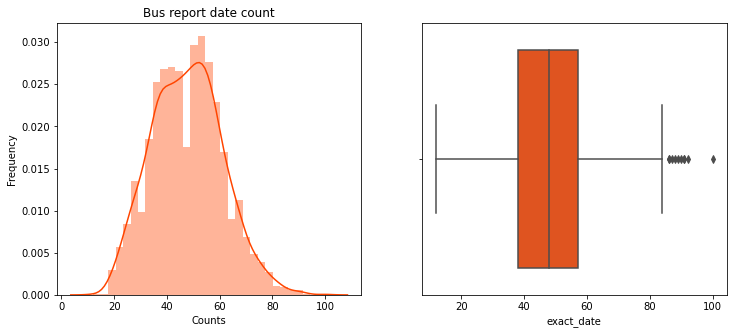

In [7]:
subway_date_counts = subway_df.exact_date.value_counts()
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(subway_date_counts, ax=ax[0], color="orangered", kde=True);
ax[0].set_xlabel("Counts")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Bus report date count");

sns.boxplot(subway_date_counts, ax=ax[1], color="orangered");

In [8]:
# a function to find quantiles, or where most data are.
def compute_quantiles(col_counts):
    Q1 =  np.quantile(col_counts, 0.25)
    Q3 =  np.quantile(col_counts, 0.75)
    IQR = Q3 - Q1
    print('Most data are within %d to %d.'%(Q1,Q3))
    print('Median is', np.quantile(col_counts, 0.5))
    print('The data are usually below %d.'%np.quantile(col_counts, 0.95))
    
    lower_fence = Q1 - 1.5 * (IQR)
    upper_fence = Q3  + 1.5 * (IQR)
    outlier = col_counts[col_counts < lower_fence].sum() + col_counts[col_counts > upper_fence].sum()
    print('Anything above %d and below %d is an outlier.'%(upper_fence,lower_fence))
    print("There are %d outliers." %outlier)
    print('Maximum occurence is %d of %s.' %(col_counts.max(), col_counts.index[0]))

In [9]:
compute_quantiles(subway_date_counts)

Most data are within 38 to 57.
Median is 48.0
The data are usually below 70.
Anything above 85 and below 9 is an outlier.
There are 900 outliers.
Maximum occurence is 100 of 2014-02-05.


### Insights
- The bus and streetcar graphs both seem to be right skewed with many outliers on the right.
- The subway graph seem to be a normal distribution.

### 3.4.2 Delay by Exact Time Counts

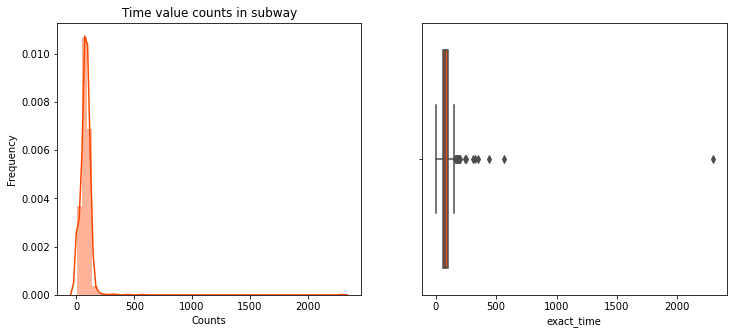

In [11]:
subway_time_counts = subway_df.exact_time.value_counts()
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(subway_time_counts, ax=ax[0], color="orangered", kde=True);
ax[0].set_xlabel("Counts")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Time value counts in subway");

sns.boxplot(subway_time_counts, ax=ax[1], color="orangered");

In [12]:
compute_quantiles(subway_time_counts)

Most data are within 59 to 100.
Median is 79.0
The data are usually below 129.
Anything above 161 and below -2 is an outlier.
There are 6744 outliers.
Maximum occurence is 2294 of 10:00:00 PM.


### 3.4.3 More on continuous variables

In [14]:
subway_df.columns

Index(['exact_date', 'exact_time', 'day_of_week', 'station', 'code',
       'delay_min', 'gap_min', 'bound', 'line', 'vehicle', 'year', 'month',
       'day', 'hour', 'min', 'at_station', 'line_simp', 'delay_type'],
      dtype='object')

In [25]:
# initialize continuous variables
subway_cont = subway_df[['year','month','day','hour','min','delay_min','gap_min','vehicle']]

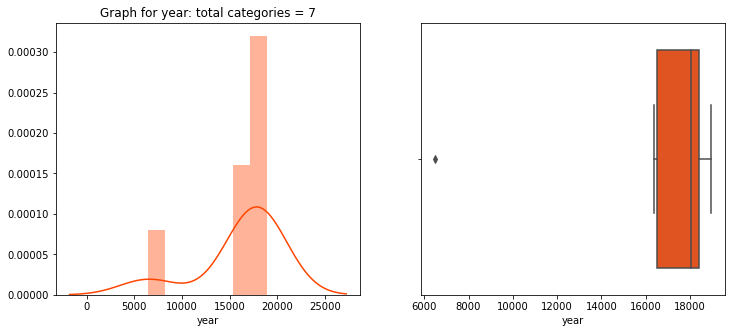

Most data are within 16521 to 18431.
Median is 18037.0
The data are usually below 18927.
Anything above 21295 and below 13657 is an outlier.
There are 6473 outliers.
Maximum occurence is 18974 of 2015.




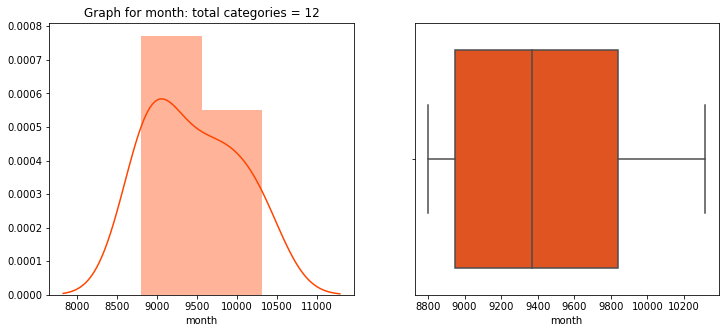

Most data are within 8947 to 9838.
Median is 9366.5
The data are usually below 10298.
Anything above 11174 and below 7612 is an outlier.
There are 0 outliers.
Maximum occurence is 10315 of 3.




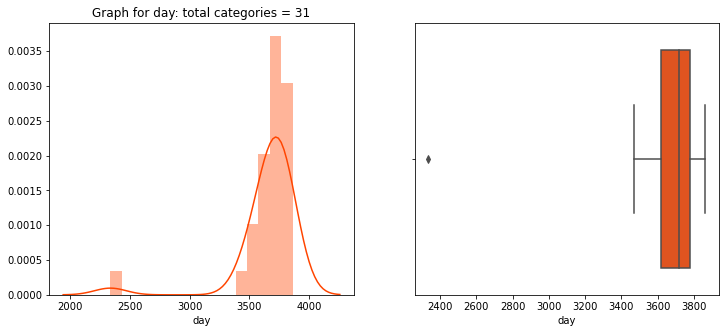

Most data are within 3619 to 3776.
Median is 3717.0
The data are usually below 3826.
Anything above 4012 and below 3382 is an outlier.
There are 2335 outliers.
Maximum occurence is 3862 of 10.




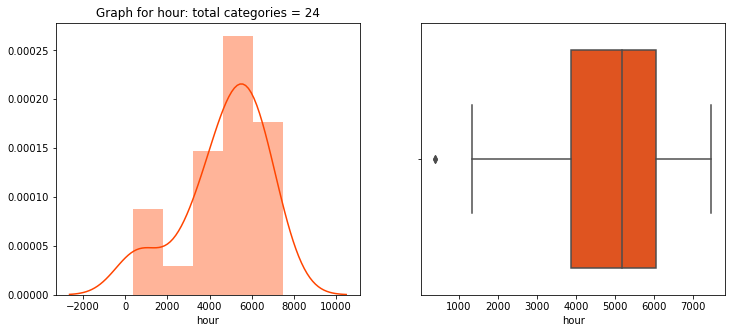

Most data are within 3877 to 6043.
Median is 5161.5
The data are usually below 6970.
Anything above 9290 and below 629 is an outlier.
There are 773 outliers.
Maximum occurence is 7464 of 8.




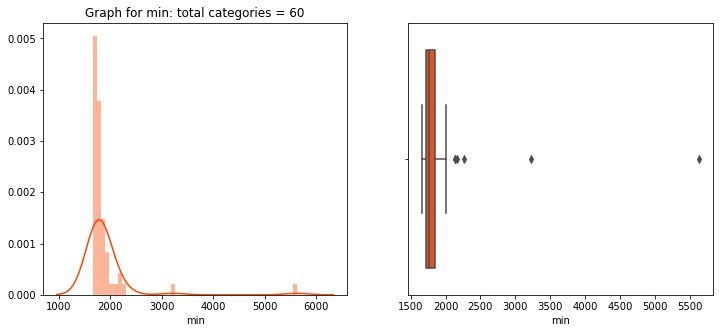

Most data are within 1724 to 1842.
Median is 1759.5
The data are usually below 2168.
Anything above 2019 and below 1547 is an outlier.
There are 17550 outliers.
Maximum occurence is 5625 of 0.




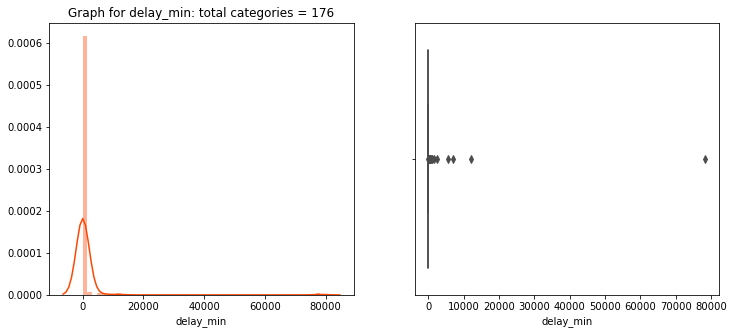

Most data are within 1 to 10.
Median is 2.0
The data are usually below 582.
Anything above 23 and below -12 is an outlier.
There are 112842 outliers.
Maximum occurence is 78306 of 0.




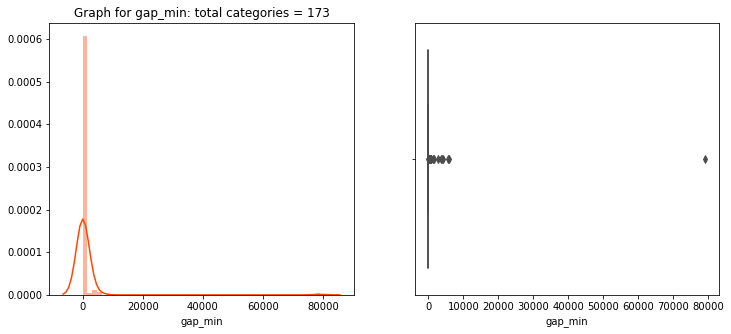

Most data are within 1 to 10.
Median is 3.0
The data are usually below 1044.
Anything above 23 and below -12 is an outlier.
There are 112897 outliers.
Maximum occurence is 79085 of 0.




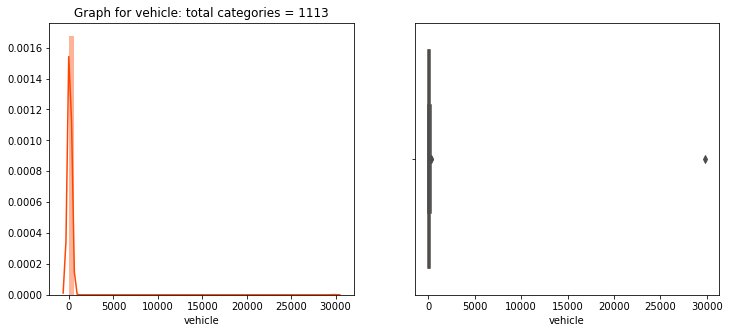

Most data are within 1 to 128.
Median is 61.0
The data are usually below 248.
Anything above 318 and below -189 is an outlier.
There are 30458 outliers.
Maximum occurence is 29809 of 0.




In [26]:
# Using a for loop to plot each continous variables and compute quantiles.
for col in subway_cont.columns:
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    cont_num = subway_cont[col].value_counts()
    chart = sns.distplot(cont_num, ax=ax[0], color="orangered", kde=True)
    #ax[0].set_xlabels()
    ax[0].set_title("Graph for %s: total categories = %d" %(col, len(cont_num)))
    sns.boxplot(cont_num, ax=ax[1], color="orangered")
    plt.show()

    compute_quantiles(cont_num)
    print('\n')

### 3.4.4 Correlation Matrix

<AxesSubplot:>

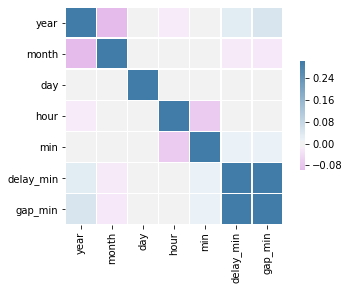

In [17]:
# check correlations between continuous variables
cmap = sns.diverging_palette(660, 600, as_cmap=True)
sns.heatmap(subway_cont.corr(), vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 3.5 Analyzing Categorical Variables (using bar graphs and pivot tables)

In [19]:
subway_df.columns

Index(['exact_date', 'exact_time', 'day_of_week', 'station', 'code',
       'delay_min', 'gap_min', 'bound', 'line', 'vehicle', 'year', 'month',
       'day', 'hour', 'min', 'at_station', 'line_simp', 'delay_type'],
      dtype='object')

In [29]:
# dataframe for categorical variables
subway_cat = subway_df[['year','month','day','hour','day_of_week', 'code','bound', 'at_station', 'line_simp','delay_type']]

Graph for year: total categories = 7


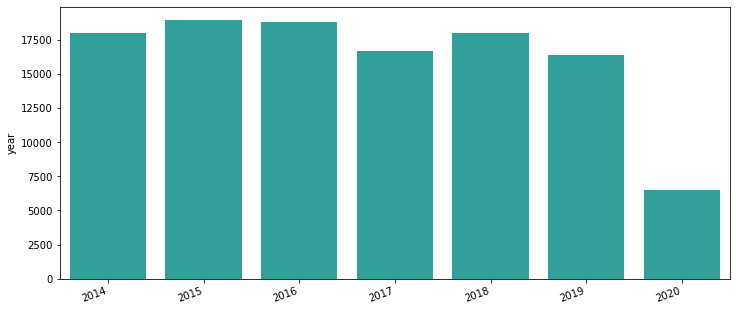

Graph for month: total categories = 12


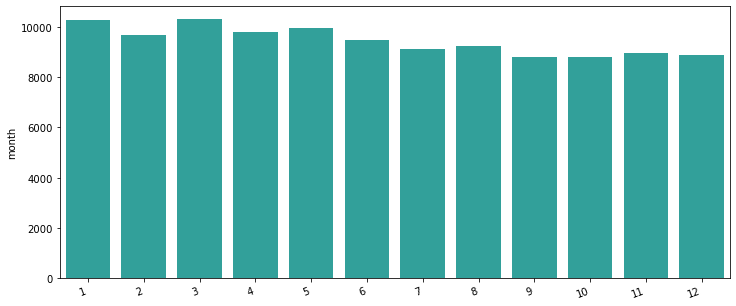

Graph for day: total categories = 31


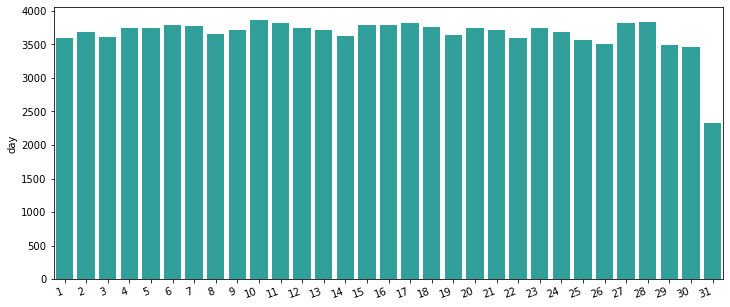

Graph for hour: total categories = 24


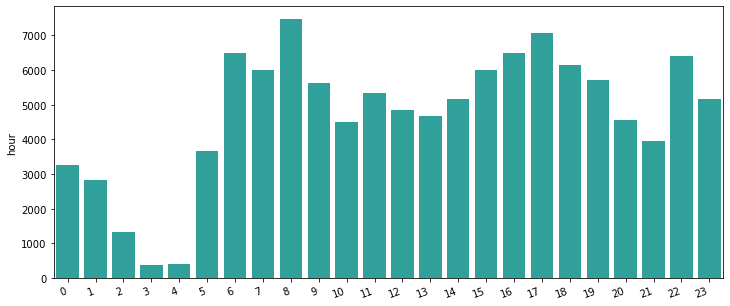

Graph for day_of_week: total categories = 7


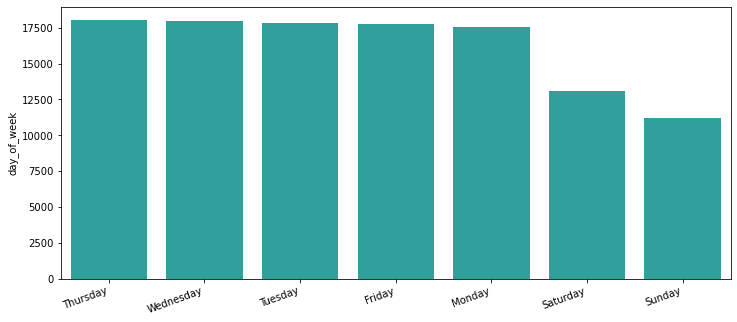

Graph for code: total categories = 215


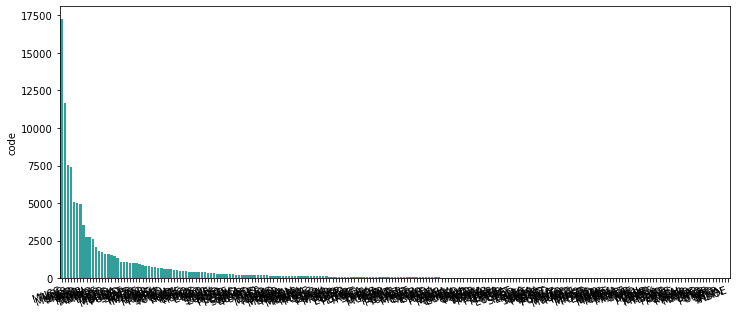

Graph for bound: total categories = 5


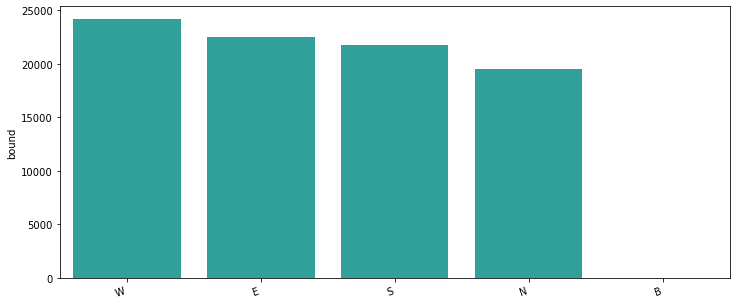

Graph for at_station: total categories = 2


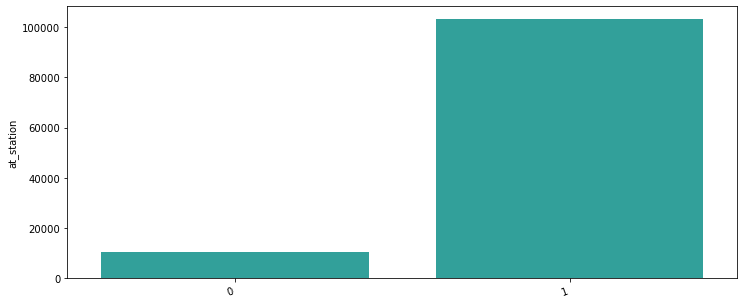

Graph for line_simp: total categories = 4


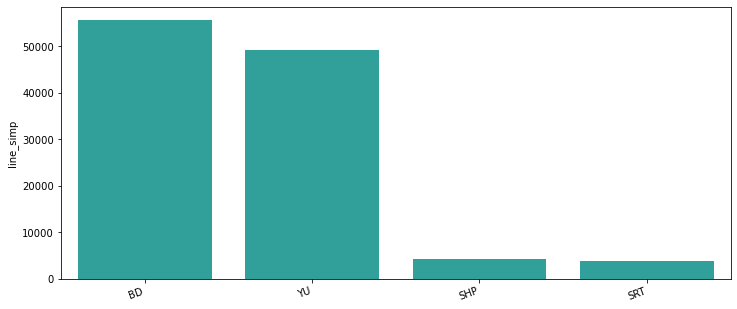

Graph for delay_type: total categories = 3


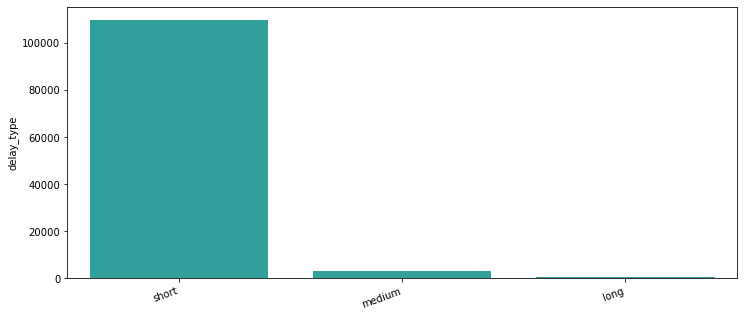

In [30]:
# Inspired by Ken Jee
# Using a for loop to plot each categorical variable.
for col in subway_cat.columns:
    plt.figure(figsize=(12,5))
    cat_num = subway_cat[col].value_counts()
    print("Graph for %s: total categories = %d" %(col, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num,color="lightseagreen")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
    plt.show()

### Top 10 Station

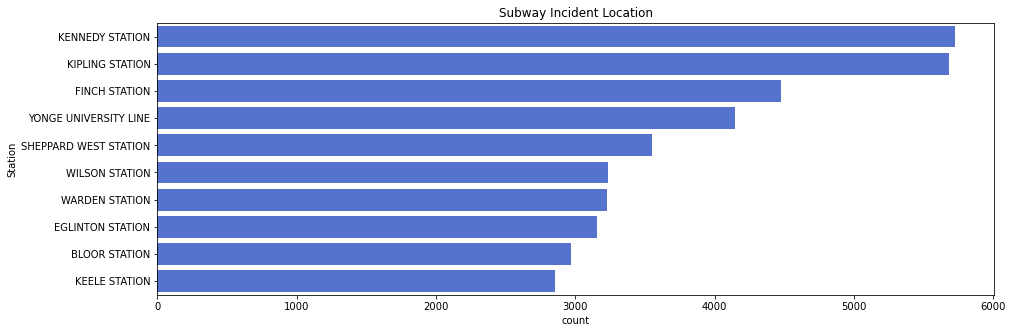

In [22]:
fig, ax =plt.subplots(1,1,figsize=(15,5))
sns.countplot(y=subway_df.Station, order= subway_df.Station.value_counts().iloc[:10].index, ax=ax, color="royalblue");
ax.set_title("Subway Incident Location");

Although Younge University Line is the fourth on our list, there's actually no delays on the record

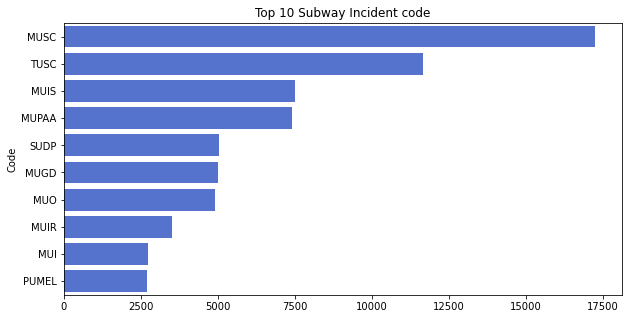

In [24]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(y=subway_df.Code, order= subway_df.Code.value_counts().iloc[:10].index, color="royalblue")
ax.set_title("Top 10 Subway Incident code")
ax.set_xlabel('');

Read more about subway delay:
https://www.lowandhigh.xyz/magazine/2019/2/7/dont-be-so-quick-to-blame-the-ttc-for-delays-on-the-subway#:~:text=Miscellaneous%20speed%20control%20is%20when,control%20to%20reset%20and%20proceed

According to TTC subway delay code description:
- MUSC: Miscellaneous Speed Control
- TUSC: Operator Overspeeding
- MUPAA: Passenger Assistance Alarm Activated - No Trouble Found
- MUIS: Injured or ill Customer (In Station) - Transported
- SUDP: Disorderly Patron
- MUO: Miscellaneous Other
- MUGD: Miscellaneous General Delays
- MUIR: Injured or ill Customer (On Train) - Medical Aid Refused
- MUI: Injured or ill Customer (On Train) - Transported
- TUMVS: Operator Violated Signal


### 3.5.2 Pivot Tables

In [31]:
subway_df.columns

Index(['exact_date', 'exact_time', 'day_of_week', 'station', 'code',
       'delay_min', 'gap_min', 'bound', 'line', 'vehicle', 'year', 'month',
       'day', 'hour', 'min', 'at_station', 'line_simp', 'delay_type'],
      dtype='object')

In [32]:
subway_df_pivots  = subway_df[['exact_date', 'exact_time', 'day_of_week', 'station', 'code',
         'gap_min', 'bound', 'line', 'vehicle', 'year', 'month',
       'day', 'hour', 'min', 'at_station', 'line_simp', 'delay_type','delay_min',]]

In [33]:
try:
    for col in subway_df_pivots.columns:
        print(col)
        print(pd.pivot_table(subway_df_pivots, index = col , values="delay_min").sort_values("delay_min", ascending=False))
except ValueError:
    pass

exact_date
            delay_min
exact_date           
2015-02-17  19.963636
2018-10-20  16.111111
2015-02-07  12.708333
2016-05-19  12.396226
2017-06-03  11.552632
...               ...
2015-03-18   0.382353
2017-05-07   0.250000
2015-03-21   0.211538
2017-07-09   0.157895
2015-12-25   0.153846

[2373 rows x 1 columns]
exact_time
             delay_min
exact_time            
4:47:00 AM   38.600000
6:56:00 AM   13.867470
5:16:00 AM   11.684211
12:35:00 PM  10.904762
8:28:00 PM    9.527778
...                ...
3:05:00 AM    0.000000
3:04:00 AM    0.000000
4:17:00 AM    0.000000
4:18:00 AM    0.000000
3:36:00 AM    0.000000

[1437 rows x 1 columns]
day_of_week
             delay_min
day_of_week           
Saturday      2.269707
Tuesday       2.163229
Sunday        2.109722
Monday        2.021444
Thursday      2.018725
Wednesday     2.007752
Friday        1.998084
station
                        delay_min
station                          
SPADINA TO OSGOODE         159.00
LAWRENCE EAST 

In [ ]:
bus_df.columns

In [ ]:
pd.pivot_table(bus_df, index="Incident", values="delay_min").sort_values("delay_min", ascending = False)

In [ ]:
pd.set_option("display.max_rows", 50)

In [ ]:
pd.pivot_table(bus_df, index=["Incident","direction_simp"], values="delay_min", aggfunc="count").sort_values("delay_min", ascending=False)

In [ ]:
pd.pivot_table(bus_df[bus_df.direction_simp == "S"], index="Incident", values="delay_min").sort_values("delay_min", ascending=False)

In [ ]:
pd.pivot_table(bus_df, index="direction_simp", values="delay_min")

In [ ]:
pd.pivot_table(bus_df_pivots, index= "Incident", columns="at_station", values="delay_min", aggfunc="count")

In [51]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [55]:
# Only look at record at station
subway_df_station = subway_df[subway_df['Station'].str.contains('STATION')]

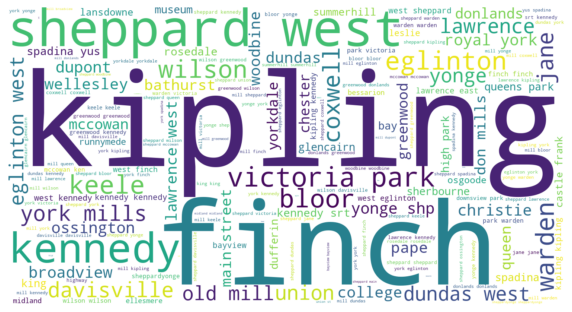

In [56]:
words = " ".join(subway_df_station['Station'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

unwanted = ['station','bd']

text = " ".join([ele for ele in words_filtered if ele not in unwanted])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1500, height = 800)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()